In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from Energy_Models.ConvLstm import ConvLstm


In [2]:
df = pd.read_csv("C:\\Users\\delll\\Downloads\\energydata_complete.csv",index_col="date")

In [3]:
#df2    = df.copy()
scaler = MinMaxScaler().fit(df)
df    = pd.DataFrame(scaler.transform(df))

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [4]:
X_train ,X_test ,Y_train ,Y_test=train_test_split(X ,y ,test_size=0.30,random_state=35)
X_train = np.array(X_train)
X_test  = np.array(X_test)

In [5]:
X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape


((13814, 27), (5921, 27), (13814,), (5921,))

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import  Dense, Dropout, LSTM, Input,Flatten,ConvLSTM2D,BatchNormalization,RepeatVector,Reshape,TimeDistributed

In [7]:
n_steps, n_features = 1, X_train.shape[1]
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = ConvLstm(n_steps,n_features).getModel()

In [8]:
X_train=X_train.reshape((X_train.shape[0],1,1,n_steps,X_train.shape[1]))
X_test=X_test.reshape((X_test.shape[0],1,1,n_steps,X_test.shape[1]))

In [9]:
model.compile(optimizer='adam', loss ='mse')
history = model.fit(
        X_train,
        Y_train,  
        shuffle=True,
        batch_size=512,
        epochs=200,
        verbose=1,
validation_split=0.3)

Epoch 1/200
19/19 [==============================] - 25s 252ms/step - loss: 0.0108 - val_loss: 0.0100
Epoch 2/200
19/19 [==============================] - 3s 158ms/step - loss: 0.0093 - val_loss: 0.0096
Epoch 3/200
19/19 [==============================] - 3s 162ms/step - loss: 0.0092 - val_loss: 0.0095
Epoch 4/200
19/19 [==============================] - 3s 155ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 5/200
19/19 [==============================] - 3s 157ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 6/200
19/19 [==============================] - 3s 156ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 7/200
19/19 [==============================] - 3s 159ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 8/200
19/19 [==============================] - 3s 159ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 9/200
19/19 [==============================] - 3s 156ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 10/200
19/19 [==============================] - 3s 155ms/step - loss: 0.0091 - val_l

19/19 [==============================] - 3s 158ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 82/200
19/19 [==============================] - 3s 155ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 83/200
19/19 [==============================] - 3s 157ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 84/200
19/19 [==============================] - 3s 159ms/step - loss: 0.0073 - val_loss: 0.0082
Epoch 85/200
19/19 [==============================] - 3s 158ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 86/200
19/19 [==============================] - 3s 155ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 87/200
19/19 [==============================] - 3s 161ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 88/200
19/19 [==============================] - 4s 192ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 89/200
19/19 [==============================] - 3s 181ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 90/200
19/19 [==============================] - 3s 163ms/step - loss: 0.0073 - val_loss: 

Epoch 161/200
19/19 [==============================] - 3s 156ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 162/200
19/19 [==============================] - 3s 155ms/step - loss: 0.0072 - val_loss: 0.0079
Epoch 163/200
19/19 [==============================] - 3s 160ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 164/200
19/19 [==============================] - 3s 157ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 165/200
19/19 [==============================] - 3s 158ms/step - loss: 0.0072 - val_loss: 0.0079
Epoch 166/200
19/19 [==============================] - 3s 155ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 167/200
19/19 [==============================] - 3s 159ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 168/200
19/19 [==============================] - 3s 156ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 169/200
19/19 [==============================] - 3s 155ms/step - loss: 0.0072 - val_loss: 0.0079
Epoch 170/200
19/19 [==============================] - 3s 158ms/step - lo

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test) 

186/186 [==============================] - 2s 9ms/step


In [12]:
model.evaluate(X_train,Y_train)

432/432 [==============================] - 4s 10ms/step - loss: 0.0074


0.0073870387859642506

In [13]:
model.evaluate(X_test,Y_test)

186/186 [==============================] - 2s 10ms/step - loss: 0.0071


0.00709097646176815

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [15]:
print('Train RMSE value for LSTM Model  : %.3f ' % root_mean_squared_error(Y_train, y_pred_train))
print('Train MSE value for LSTM Model  : %.3f ' % mean_squared_error(Y_train, y_pred_train))
print('Train R2 value for LSTM Model  : %.3f ' % r2_score(Y_train, y_pred_train))
print('Train MAPE value for LSTM Model  : %.3f ' % mean_absolute_percentage_error(Y_train, y_pred_train))
print('Train RMLSE value for LSTM Model  : %.3f ' % mean_squared_log_error(Y_train, y_pred_train))
print('Train MAE value for LSTM Model  : %.3f ' % mean_absolute_error(Y_train, y_pred_train))
print('---------------------------------------------')
print('Test RMSE value for LSTM Model  : %.3f ' % root_mean_squared_error(Y_test, y_pred_test))
print('Test MSE value for LSTM Model  : %.3f ' % mean_squared_error(Y_test, y_pred_test))
print('Test R2 value for LSTM Model  : %.3f ' % r2_score(Y_test, y_pred_test))
print('Test MAPE value for LSTM Model  : %.3f ' % mean_absolute_percentage_error(Y_test, y_pred_test))
print('Test RMLSE value for LSTM Model  : %.3f ' % mean_squared_log_error(Y_test, y_pred_test))
print('Test MAE value for LSTM Model  : %.3f ' % mean_absolute_error(Y_test, y_pred_test))

Train RMSE value for LSTM Model  : 0.086 
Train MSE value for LSTM Model  : 0.007 
Train R2 value for LSTM Model  : 0.201 
Train MAPE value for LSTM Model  : 107160012384.626 
Train RMLSE value for LSTM Model  : 0.005 
Train MAE value for LSTM Model  : 0.043 
---------------------------------------------
Test RMSE value for LSTM Model  : 0.084 
Test MSE value for LSTM Model  : 0.007 
Test R2 value for LSTM Model  : 0.214 
Test MAPE value for LSTM Model  : 87168560303.830 
Test RMLSE value for LSTM Model  : 0.005 
Test MAE value for LSTM Model  : 0.043 


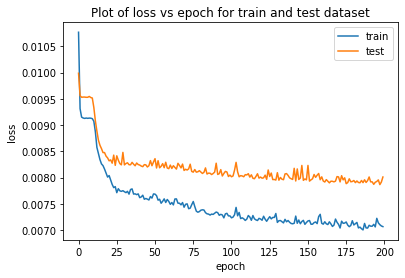

In [16]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()